## Importing required packages

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the data
train = pd.read_csv('train_Bigmart_Sales_Prediction.csv')
test = pd.read_csv('test_Bigmart_Sales_Prediction.csv')

## EDA:-

In [3]:
# dimentions of training and testing datasets
print('training set shape', train.shape)
print('testing set shape', test.shape)

training set shape (8523, 12)
testing set shape (5681, 11)


In [4]:
# Observations from training dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Observations from testing dataset
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
# features datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# 5 number summary for training dataset with numeric features
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# 5 number summary for training dataset with categorical features
train.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [9]:
# duplicate observation check
print(train.duplicated().value_counts())
print(train.duplicated().unique())

# from the below result we can see that there are no duplicate entries in dataset

False    8523
dtype: int64
[False]


### Univariate Analysis :-

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

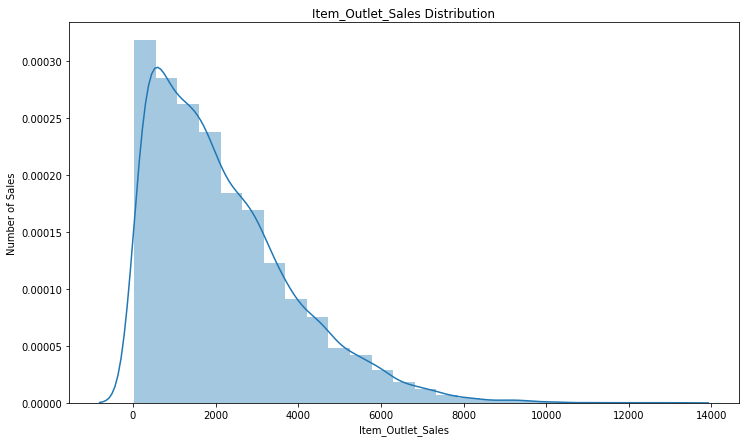

In [10]:
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Number of Sales')
plt.title('Item_Outlet_Sales Distribution')

In [11]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

# from the below result we can see that target variable is positively skewed.

Skew is: 1.1775306028542798
Kurtosis: 1.615877


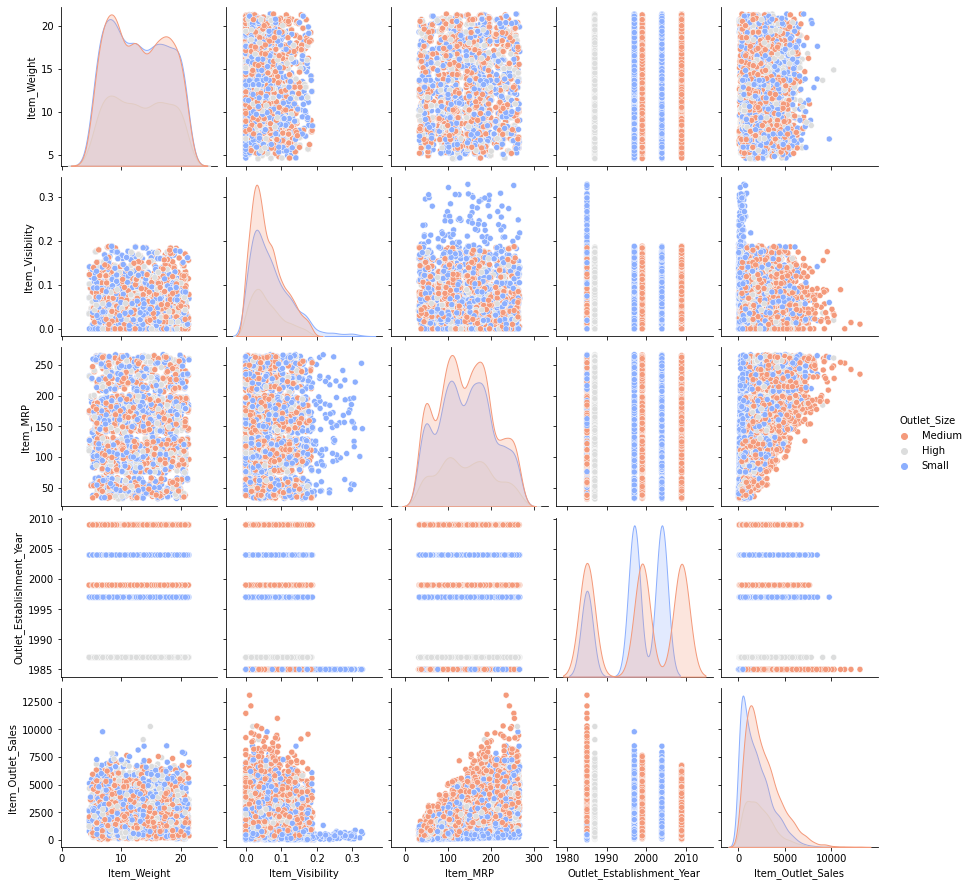

In [12]:
# pairwise relationship between features
sns.pairplot(train,hue='Outlet_Size',palette='coolwarm_r')
plt.show()

### Numerical Features:-

In [13]:
# select numeric features from dataset
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [14]:
# Correlation between Numerical Features and Target variable
corr =numeric_features.corr()
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

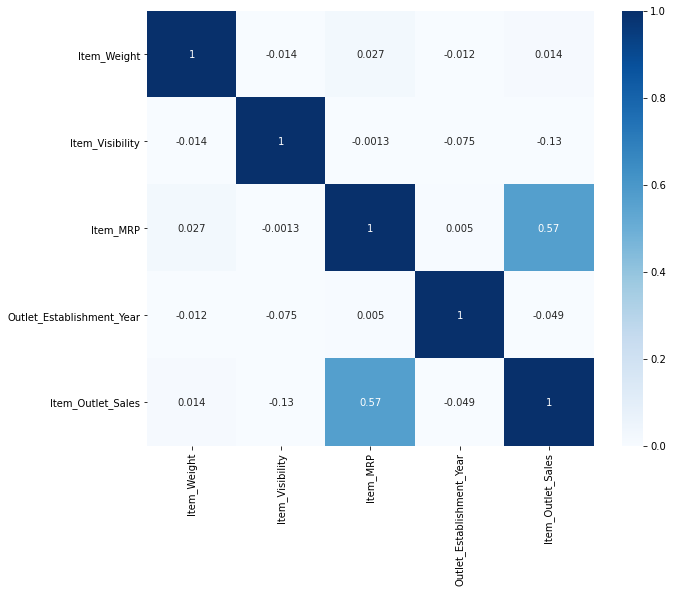

In [15]:
# Correlation visualization using heatmap
fig= plt.figure(figsize=(10,8))
sns.heatmap(corr,vmax=1,vmin=0,fmt='.2g',cmap='Blues',annot=True,linecolor='white',cbar=True )
plt.show()

#### Note:- From the above correlation matrix we can see that,
  1. Outlet_Establishment_Year & Item_Visibility features has
     lowest correlation with target variable.

  2. Item_MRP has the highest positive correlation with target.


### Categorical Features and Their Distributions:-

In [16]:
# select categorical features from dataset
categorical_features = train.select_dtypes(include='object')
categorical_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

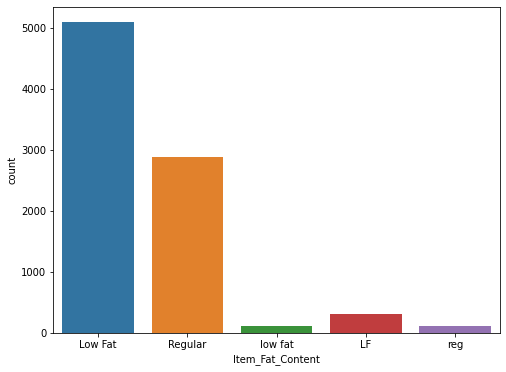

In [17]:
# Distribution of the variable Item_Fat_Content
fig= plt.figure(figsize=(8,6))
sns.countplot(train.Item_Fat_Content)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

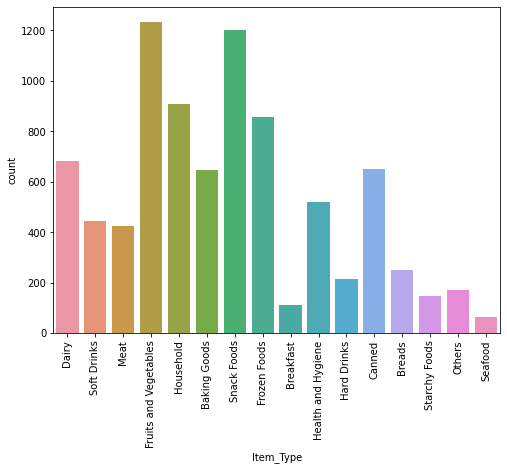

In [18]:
# Distribution of the variable Item_Type
fig= plt.figure(figsize=(8,6))
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

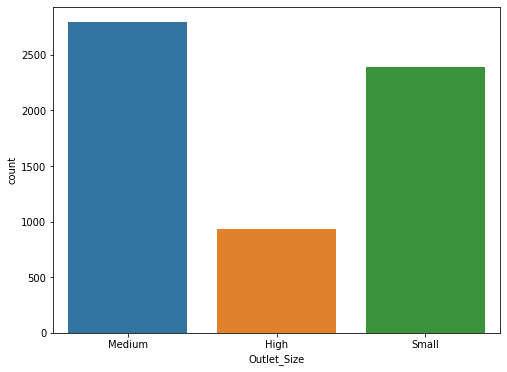

In [19]:
# Distribution of the variable Outlet_Size
fig= plt.figure(figsize=(8,6))
sns.countplot(train.Outlet_Size)
plt.show()

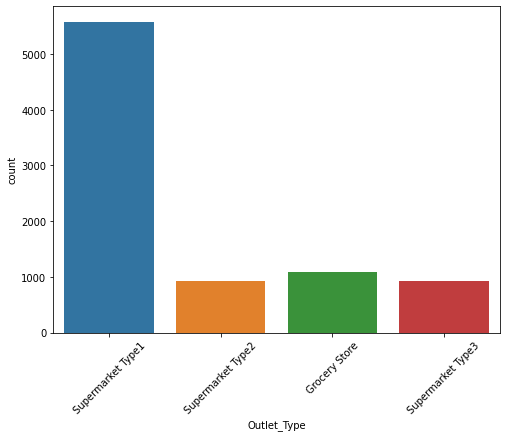

In [20]:
 # Distribution of the variable Outlet_Type
fig= plt.figure(figsize=(8,6))
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis :-

'# From the below graph we can see that Item_Weight has low correlation with target variable Item_Outlet_Sales.'

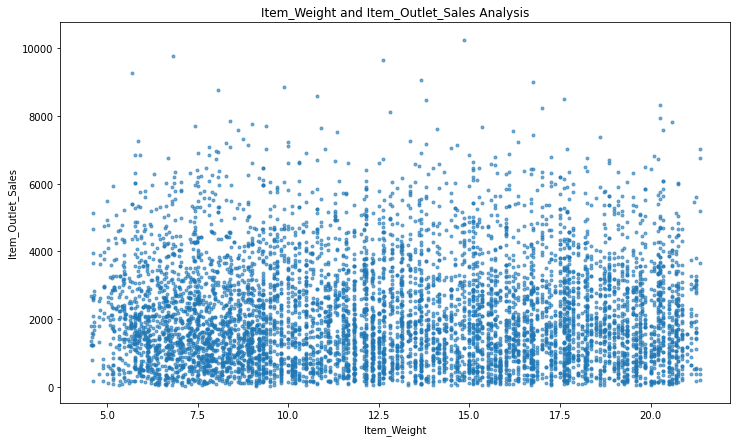

In [21]:
# Item_Weight Vs Item_Outlet_Sales
plt.figure(figsize=(12,7))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
plt.plot(train.Item_Weight, train['Item_Outlet_Sales'],'.', alpha = 0.6)

'''# From the below graph we can see that Item_Weight has low correlation with target variable Item_Outlet_Sales.'''

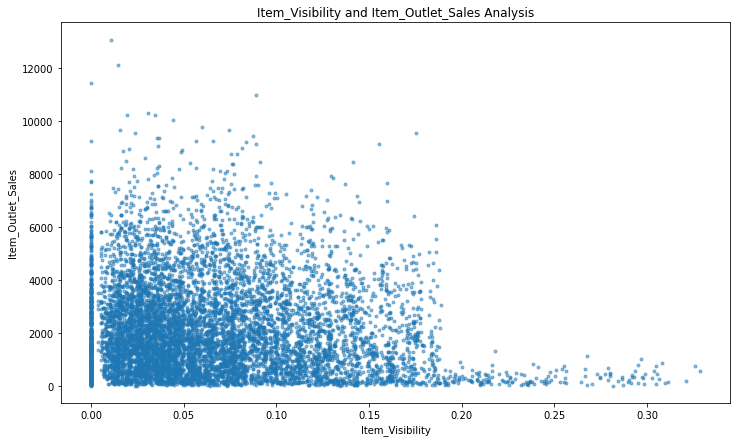

In [22]:
# Item_Visibility Vs Item_Outlet_Sales
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(train.Item_Visibility, train['Item_Outlet_Sales'],'.', alpha = 0.5)

' From the below graph we can see that, as the Item_MRP increases, Item_Outlet_Sales also increases'

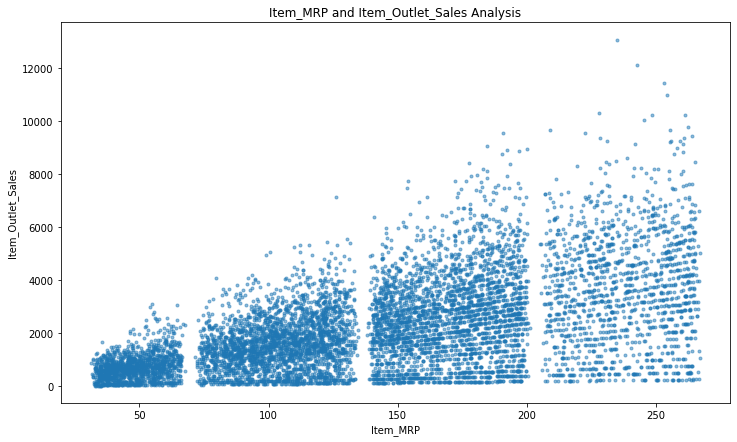

In [23]:
# Item_MRP Vs Item_Outlet_Sales
plt.figure(figsize=(12,7))
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_MRP and Item_Outlet_Sales Analysis')
plt.plot(train.Item_MRP, train['Item_Outlet_Sales'],'.', alpha = 0.5)

''' From the below graph we can see that, as the Item_MRP increases, Item_Outlet_Sales also increases'''

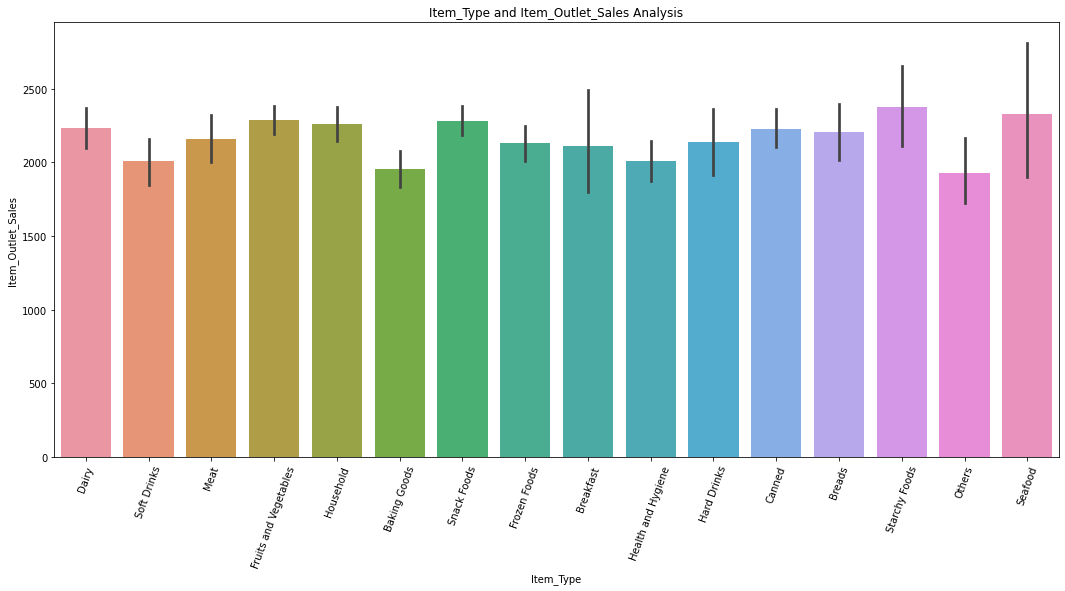

In [24]:
# Impact of Item_Type on Item_Outlet_Sales

plt.figure(figsize=(18,8))
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Type and Item_Outlet_Sales Analysis')
sns.barplot(train.Item_Type, train['Item_Outlet_Sales'])
plt.xticks(rotation=70)
plt.show()

In [25]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

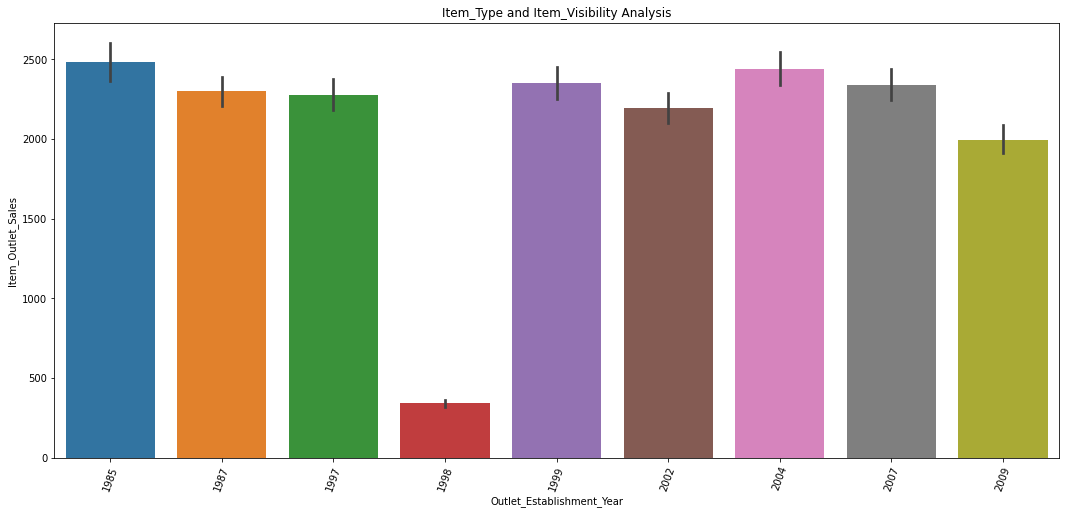

In [26]:
# Outlet_Establishment_Year Vs Item_Outlet_Sales analysis

plt.figure(figsize=(18,8))
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Type and Item_Visibility Analysis')
sns.barplot(train.Outlet_Establishment_Year, train['Item_Outlet_Sales'])
plt.xticks(rotation=70)
plt.show()

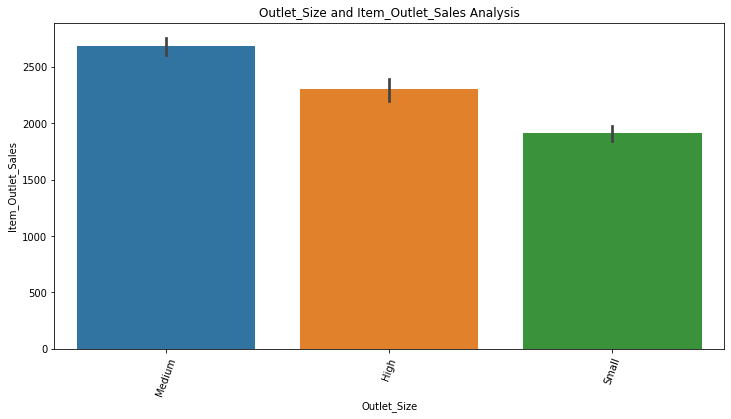

In [27]:
# Impact of Outlet_Size on Item_Outlet_Sales

plt.figure(figsize=(12,6))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Size and Item_Outlet_Sales Analysis')
sns.barplot(train.Outlet_Size, train['Item_Outlet_Sales'])
plt.xticks(rotation=70)
plt.show()

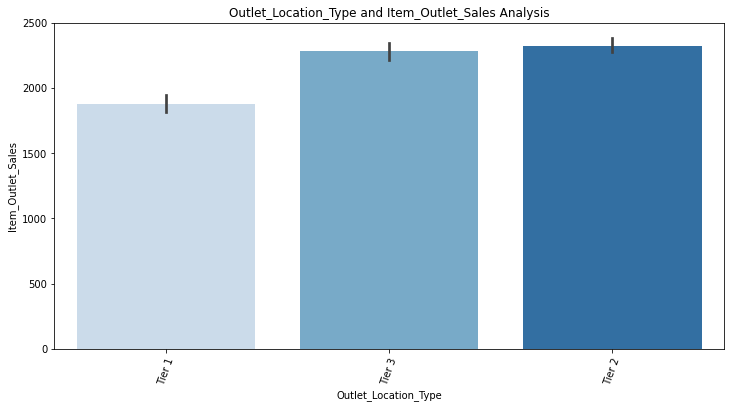

In [28]:
# Impact of Outlet_Location_Type on Item_Outlet_Sales

plt.figure(figsize=(12,6))
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Location_Type and Item_Outlet_Sales Analysis')
sns.barplot(train.Outlet_Location_Type, train['Item_Outlet_Sales'],palette ='Blues')
plt.xticks(rotation=70)
plt.show()

## Insights obtained from the data :-

### Following are the few insights obtained from data
   

* Item_Visibility does not have a high positive correlation with target.
*   There are no big variations in the sales due to the Item_Type.
*   In Item_Visibility there are items with the value zero indicating that those items are not visible in the store.
*   Maximum revenue is coming from Outlet_Size as Medium.
*   There is no significant impact of Outlet_Establishment_Year on Outlet Sales.




## Data Pre-Processing :-

### Missing Value Treatment :- 

In [29]:
# Joining Train and Test Dataset and addind new col as source for seperation later

train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [30]:
# Percentage of missing values in dataset
(data.isnull().sum()/data.shape[0]*100)

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

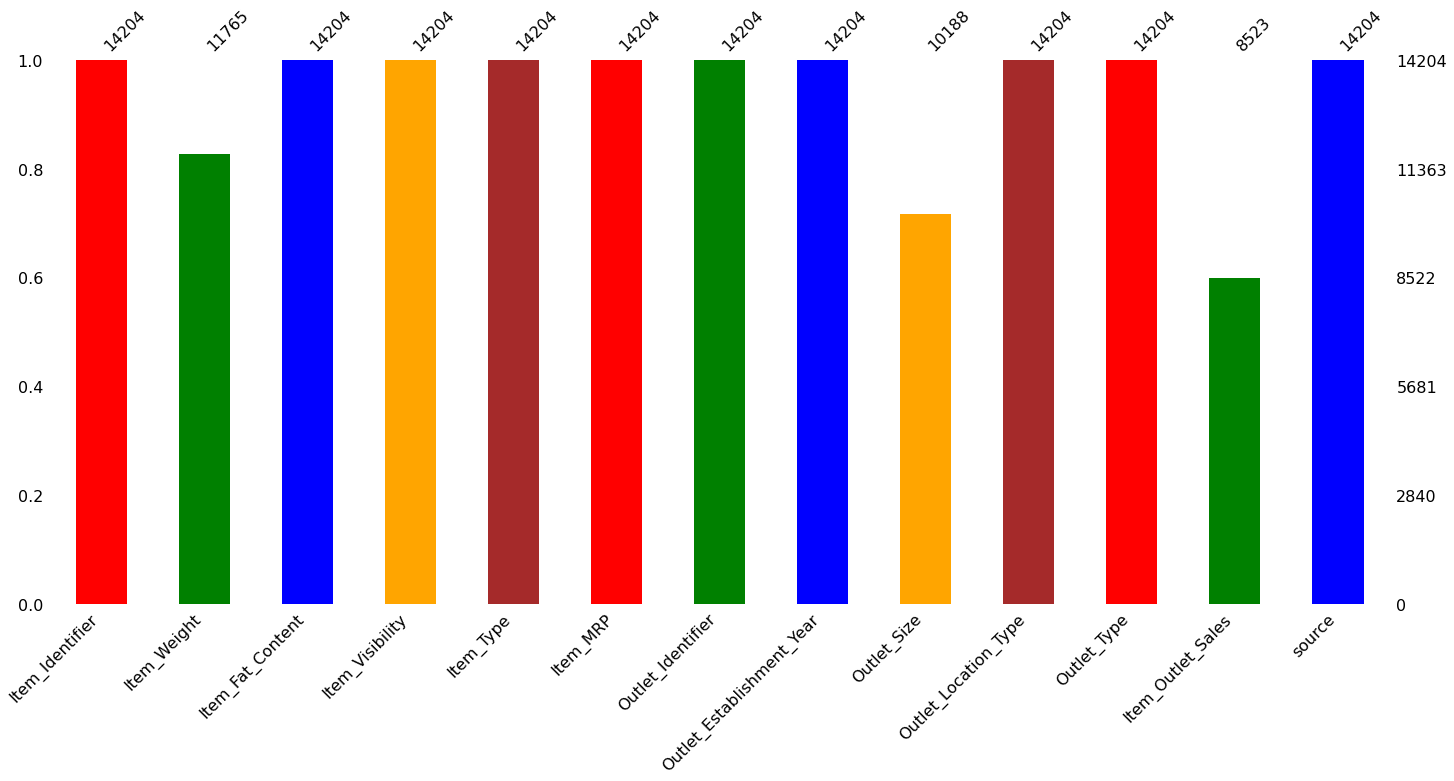

In [31]:
# Visualizaiton of missing missing values.
import missingno as msno 
msno.bar(data,color=['red','green','blue','orange','brown'])
plt.show()

In [32]:
data.Item_Weight.nunique()

415

In [33]:
# Imputing missing values from Item_Weight and Outlet_Size with mean and mode respectively.

data['Item_Weight']= data['Item_Weight'].fillna(value = data['Item_Weight'].mean())
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [34]:
# Percentage of missing values in dataset after imputation
(data.isnull().sum()/data.shape[0]*100)

# From below result we can see that, now no missing values are present in dataset predictor featrues.

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [35]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


#### Feature Engineering :-

In [36]:
# Creating new feaure with less unique values. Get the first two characters of ID.
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# Renaming these categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [38]:
# Modifing the categories of Item_Fat_Content.
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [39]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Type_Combined            object
dtype: object

In [40]:
# Categorical features Encoding to convert to numerical feature
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_

In [41]:
#Drop the columns which have been converted to different types.
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [42]:
# Divide back into test and train sets.
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [43]:
# Dropping unnecessary columns from datasets
test.drop(['Item_Outlet_Sales','source','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
train.drop(['source','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [44]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,3735.1380,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,732.3800,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,994.7052,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [45]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
8523,20.750000,0.007565,107.8622,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
8524,8.300000,0.038428,87.3198,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8525,14.600000,0.099575,241.7538,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
8526,7.315000,0.015388,155.0340,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
8527,12.792854,0.118599,234.2300,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


### Model Building, Training and Predictions :-

In [49]:
x = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=42)

In [51]:
print('X_train.shape :',X_train.shape)
print('X_test.shape :',X_test.shape)
print('y_train.shape :',y_train.shape)
print('y_test.shape :',y_test.shape)

X_train.shape : (5966, 18)
X_test.shape : (2557, 18)
y_train.shape : (5966,)
y_test.shape : (2557,)


In [60]:
# create an object of the Models
model_LR = LinearRegression()
model_RFR = RandomForestRegressor(n_estimators=50)
model_XGR = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [61]:
# fit the model with the training data
model_LR.fit(X_train, y_train)
model_RFR.fit(X_train, y_train)
model_XGR.fit(X_train, y_train)

[20:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
# predict the target on train and test data 
y_pred_LR_train = model_LR.predict(X_train)
y_pred_LR_test  = model_LR.predict(X_test)

y_pred_RFR_train = model_RFR.predict(X_train)
y_pred_RFR_test  = model_RFR.predict(X_test)

y_pred_XG_train = model_XGR.predict(X_train)
y_pred_XG_test  = model_XGR.predict(X_test)


In [64]:
# Root Mean Squared Error on train and test date

print('RMSE on train data using Linear Regression: ', mean_squared_error(y_train, y_pred_LR_train)**(0.5))
print('RMSE on test data  using Linear Regression: ',  mean_squared_error(y_test, y_pred_LR_test)**(0.5))

print('RMSE on train data using RandomForestRegressor: ', mean_squared_error(y_train, y_pred_RFR_train)**(0.5))
print('RMSE on test data using RandomForestRegressor: ',  mean_squared_error(y_test, y_pred_RFR_test)**(0.5))

print('RMSE on train data using XGBRegressor: ', mean_squared_error(y_train, y_pred_XG_train)**(0.5))
print('RMSE on test data  using XGBRegressor: ',  mean_squared_error(y_test, y_pred_XG_test)**(0.5))

RMSE on train data using Linear Regression:  1141.8637994346325
RMSE on test data  using Linear Regression:  1099.594870946925
RMSE on train data using RandomForestRegressor:  445.87014482855454
RMSE on test data using RandomForestRegressor:  1122.2174777122427
RMSE on train data using XGBRegressor:  923.0812406806283
RMSE on test data  using XGBRegressor:  1095.9810457860772


#### Conclusion :- 
The best algorithm performed was XGBRegressor which gived an RMSE of : 1095 on test data.